In [28]:
# Task1: Anomaly Detection Method 1 For Probing Dataset
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
data1=pd.read_csv('malicious_dataset.csv')
data2=pd.read_csv('normal_dataset.csv')
data1['label']=1
data2['label']=0

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

inl = data2.drop(['label'], axis=1)
out = data1.drop(['label'], axis=1)

imp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')


inl1=inl.apply(LabelEncoder().fit_transform)
out1=out.apply(LabelEncoder().fit_transform)


In [7]:
def normal_accuracy(values):
    tp=list(values).count(1)
    total=values.shape[0]
    accuracy=np.round(tp/total,4)
    return accuracy

def attack_accuracy(values):
    tn=list(values).count(-1)
    total=values.shape[0]
    accuracy=np.round(tn/total,4)
    return accuracy

In [8]:
from sklearn.ensemble import IsolationForest as IF
ifmodel = IF()
ifmodel.fit(inl1)
normal_isf = ifmodel.predict(inl1)
fraud_isf = ifmodel.predict(out1)
in_accuracy_isf=normal_accuracy(normal_isf)
out_accuracy_isf=attack_accuracy(fraud_isf)

In [58]:
df=data1+data2

In [61]:
# Task1: Analysis of Anomaly Detection Method 1 For Probing Dataset
model=DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
df=df.apply(LabelEncoder().fit_transform)
x_train, x_test,y_train,y_test=train_test_split(df.drop(['label'], axis=1), df['label'],test_size=0.2,random_state=5)
x_train=imp.fit_transform(x_train)
x_test=imp.fit_transform(x_test)
model=model.fit(x_train,y_train)


In [62]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17322
           1       1.00      1.00      1.00      3297

    accuracy                           1.00     20619
   macro avg       1.00      1.00      1.00     20619
weighted avg       1.00      1.00      1.00     20619



In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn=knn.fit(x_train,y_train)

In [49]:
y_pred2=knn.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17322
           1       1.00      1.00      1.00      3297

    accuracy                           1.00     20619
   macro avg       1.00      1.00      1.00     20619
weighted avg       1.00      1.00      1.00     20619



In [51]:
# Task1: Anomaly Detection Method 2(LocalOutlierFactor) For Probing Dataset


from sklearn.neighbors import LocalOutlierFactor as LOF
import warnings
warnings.filterwarnings('ignore')
lofmodel = LOF(novelty=True)
lofmodel.fit(inl1)

normal_lof = lofmodel.predict(inl1)
fraud_lof = lofmodel.predict(out1)

in_accuracy_lof=normal_accuracy(normal_lof)
out_accuracy_lof=attack_accuracy(fraud_lof)




In [52]:
# Task1: Analysis of Anomaly Detection Method 2 For Probing Dataset

print("Accuracy in Detecting Normal Cases:", in_accuracy_lof)
print("Accuracy in Detecting Fraud Cases:", out_accuracy_lof)





Accuracy in Detecting Normal Cases: 0.9963
Accuracy in Detecting Fraud Cases: 0.0029


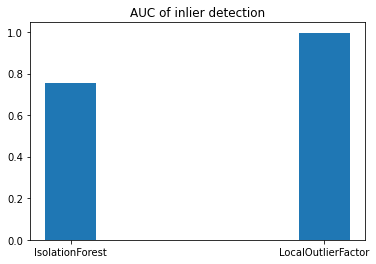

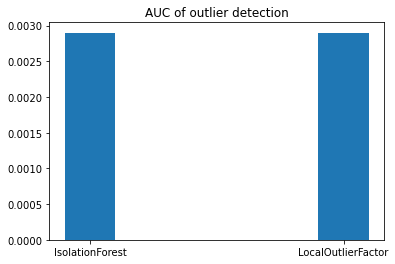

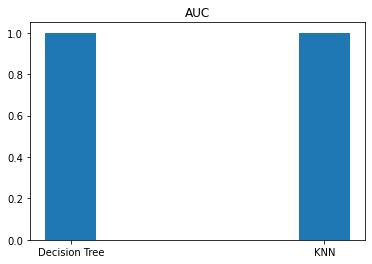

In [53]:
# Task1: Comparison of Anomaly Detection Method 1 and Method 2 For Probing Dataset
import matplotlib.pyplot as plt
plt.bar(["IsolationForest","LocalOutlierFactor"],[in_accuracy_isf,in_accuracy_lof],width=0.2)
plt.title("AUC of inlier detection")
plt.show()
plt.bar(["IsolationForest","LocalOutlierFactor"],[out_accuracy_lof,out_accuracy_lof],width=0.2)
plt.title("AUC of outlier detection")
plt.show()
plt.bar(["Decision Tree","KNN"],[accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred2)],width=0.2)
plt.title("AUC")
plt.show()




